In [45]:
import tensorflow as tf
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2024-04-30 19:39:43.988986: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-30 19:39:43.990657: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-30 19:39:44.019540: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-30 19:39:44.676674: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [46]:
X = np.load('X.npy')
y = np.load('y.npy')
print("len(X):", len(X))
print("len(y):", len(y))

len(X): 199
len(y): 199


In [47]:
num_classes = 3
y = tf.keras.utils.to_categorical(y, num_classes)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
print("len(X_train):", len(X_train))
print("len(X_test):", len(X_test))
print("len(y_train):", len(y_train))
print("len(y_test):", len(y_test))

len(X_train): 159
len(X_test): 40
len(y_train): 159
len(y_test): 40


In [50]:
X_train[0].shape

(62, 128)

In [51]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(62,128), dtype=tf.float32, name='input_embedding'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
], name='vggish_model')


# Compile the model
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=METRICS)


model.summary()

Model: "vggish_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 7936)              0         
                                                                 
 dense (Dense)               (None, 512)               4063744   
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 4065283 (15.51 MB)
Trainable params: 4065283 (15.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-04-30 19:42:25.950401: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-30 19:42:25.951199: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [52]:
from tensorflow.keras.callbacks import EarlyStopping

EPOCHS = 10
early_stopping = EarlyStopping(monitor='val_loss', patience=EPOCHS//3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data = (X_test, y_test), batch_size=64,callbacks=[early_stopping])

Epoch 1/10
3/3 [==============================] - 1s 136ms/step - loss: 1.0947 - accuracy: 0.3396 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0879 - val_accuracy: 0.4750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 49ms/step - loss: 1.0601 - accuracy: 0.6918 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0621 - val_accuracy: 0.6250 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 0s 50ms/step - loss: 1.0279 - accuracy: 0.5849 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0410 - val_accuracy: 0.3750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 0s 49ms/step - loss: 0.9933 - accuracy: 0.5094 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0168 - val_accuracy: 0.5250 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 0

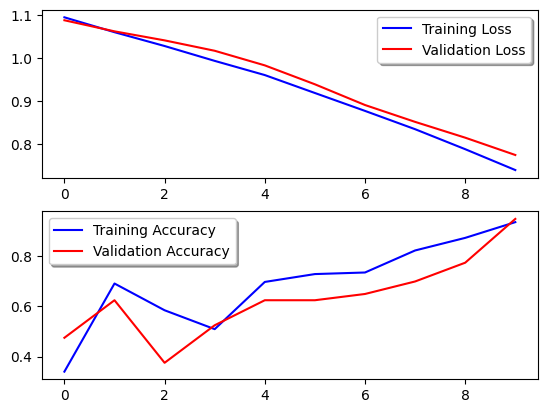

In [53]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [54]:
evaluation = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

2/2 [==============================] - 0s 5ms/step - loss: 0.7742 - accuracy: 0.9500 - precision: 1.0000 - recall: 0.5500
Test Accuracy : 95.00%


2/2 [==============================] - 0s 6ms/step


<Axes: >

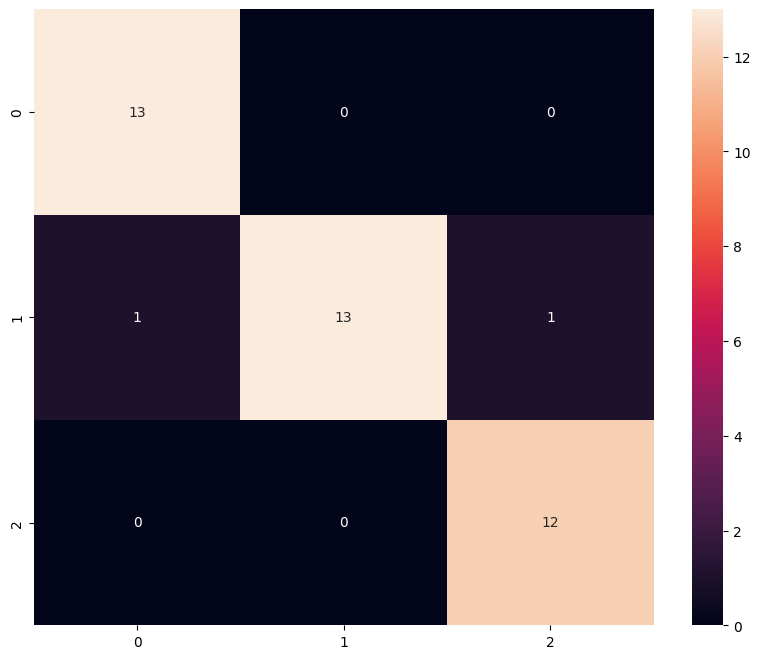

In [55]:
# Predict the values from the testing dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

In [56]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.87      0.93        15
           2       0.92      1.00      0.96        12

    accuracy                           0.95        40
   macro avg       0.95      0.96      0.95        40
weighted avg       0.95      0.95      0.95        40



In [57]:
model.save('VGGish_model.h5')

/home/hassan/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
